# Actividad - Estadística básica

* **Nombre:**
* **Matrícula:**

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio.
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite.

Carga el conjunto de datos `bestsellers with categories.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [2]:
# Carga las librerías necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('bestsellers with categories.csv')
df.head(6)

Saving bestsellers with categories.csv to bestsellers with categories (3).csv


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:
* **Name**: Nombre del libro.
* **Author**: Autor.
* **User Rating**: Calificación promedio que los usuarios asignaron al libro (1-5).
* **Reviews**: Número de reseñas.
* **Price**: Precio del libro.
* **Year**: Año de publicación.
* **Genre**: Género literario (ficción/no ficción).

In [37]:
# Crea una tabla resumen con los estadísticas generales de las variables
# numéricas.
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


Text(0, 0.5, 'Publicaciones')

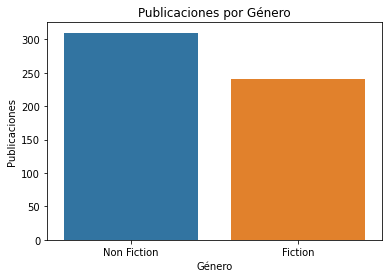

In [9]:
## ¿Cuál es el género con más publicaciones? Muéstralo en un gráfico.
fig = plt.figure(figsize=(6,4))

df2 = pd.DataFrame(df[['Genre', 'Reviews']])

sns.countplot(data=df2, x = 'Genre')

plt.title('Publicaciones por Género')
plt.xlabel('Género')
plt.ylabel('Publicaciones')

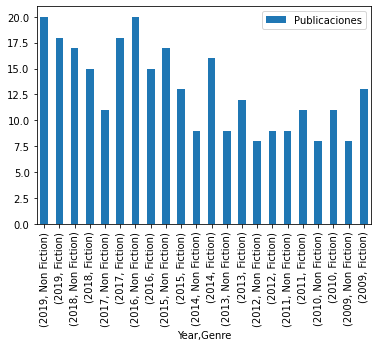

In [129]:
# ¿Cuántos libros del top 50 se publicaron por género en cada año? ¿Hay algún 
# año donde hubo más libros de ficción en el top 50?. Muéstralo en un gráfico.
df3 = pd.DataFrame(df['Year'].sort_values())
dfp = pd.DataFrame(df3["Year"].unique())
a = df3["Year"].unique()
dfd = pd.DataFrame({'Publicaciones':[], 'Genre':[], 'Year':[]})
for i in range(len(a)):
  dfy = df[df.Year == int(a[i])]
  dfr = dfy[dfy['User Rating'] >= 4.7]
  dff = dfr[dfr['Genre'] == 'Fiction']
  df1 = pd.DataFrame({'Publicaciones':[len(dff)], 'Genre':['Fiction'], 'Year':[str(a[i])]})
  dfd = pd.concat([df1, dfd])
  dfnf = dfr[dfr['Genre'] == 'Non Fiction']
  df2 = pd.DataFrame({'Publicaciones':[len(dfnf)], 'Genre':['Non Fiction'], 'Year':[str(a[i])]})
  dfd = pd.concat([df2, dfd])
dfd.set_index(['Year', 'Genre']).plot.bar(stacked=True);

En los años: 2017, 2014, 2013, 2011, 2010 y 2009 hubo más libros de ficción en el top 50 que libros que no lo fuera.
(Visualmente al menos, es difícil discernir para el año 2012)

<Axes: xlabel='Reviews', ylabel='Count'>

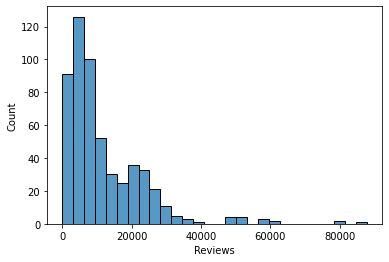

In [132]:
# ¿Cómo se distribuye la variable Review? Muéstra el histografa.
sns.histplot(data=df, x='Reviews')

Dados los datos del histograma podemos darnos cuenta que existe una tendencia a escrbir una menor cantidad de Reviews que una muy alta, pues los datos muestran una tendecnia davorable a dicho comportamiento.

<Axes: xlabel='Reviews'>

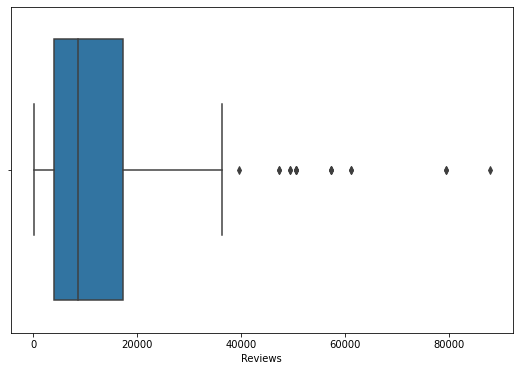

In [134]:
# Ahora muéstralo en un gráfico de caja y bigote.
fig = plt.figure(figsize=(9, 6))

sns.boxplot(data=df, x='Reviews')

Text(0.5, 1.0, 'Histograma del Rating por Género')

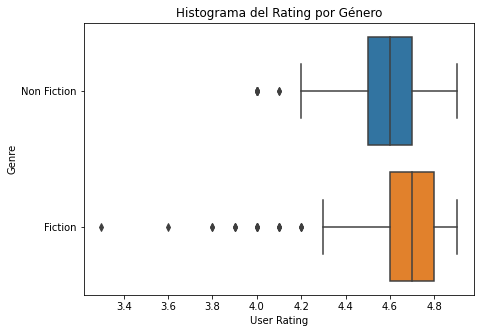

In [145]:
# ¿Cómo se compara la evaluación del libro por género? ¿Qué genero es mejor 
# evaluado por los lectores? Muéstralo en un solo gráfico de caja y bigote.
fig = plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='User Rating', y = 'Genre')
plt.title('Histograma del Rating por Género')

Dados los datos podemos observar la inclinación del género de Ficción hacia un user rating más alto, por lo que podemos determinar que dicho género en mejor evaluado.

Text(0, 0.5, 'Precio de libro')

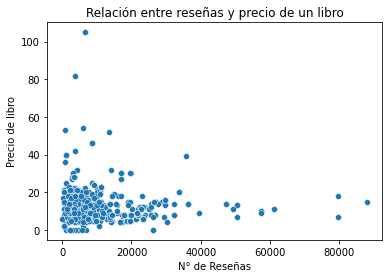

In [148]:
# ¿Cuál es la relación entre el número de reseñas y precios? Muéstralo en un
# gráfico de dispersión.
fig = plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x ='Reviews', y='Price')
plt.title('Relación entre reseñas y precio de un libro')
plt.xlabel('N° de Reseñas')
plt.ylabel('Precio de libro')

Dado el gráfico de dispersión, podemos obseravar que, a menor precio, también tiende a haber una menor cantidad de reseñas.

Text(0, 0.5, 'Precio de libro')

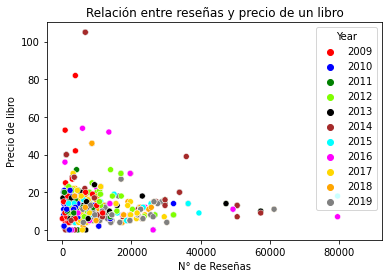

In [155]:
# De la pregunta anterior, ¿influye algo el año de publicación? ¿Cuál es la
# relación entre el número de reseñar, el precio y el año de publicación?
# IMPORTANTE: Selecciona una paleta de colores adeacuada.
fig = plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x ='Reviews', y='Price', hue='Year', palette=['red', 'blue', 'green', 'chartreuse', 'black', 'brown', 'cyan', 'magenta', 'gold', 'orange', 'grey'])
plt.title('Relación entre reseñas y precio de un libro')
plt.xlabel('N° de Reseñas')
plt.ylabel('Precio de libro')

Podemos ver que no hay ninguna relación entre el año y la cantidad de reseñas por precio del libro, pues no se agrupan de ninguna forma especial.


PD: Una disculpa, no sabía que colores usar para todos los 11 años

Text(0, 0.5, 'Precio de libro')

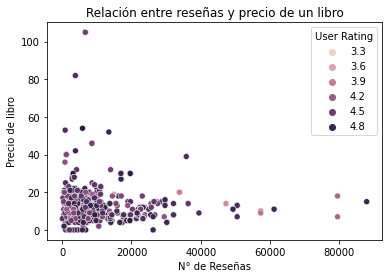

In [156]:
# ¿Cuál es la correlación entre las variables numéricas? Muéstralo en un 
# gráfico. La variable año, a pesar de ser numérica, la vamos a considerar como
# cualitativa, así que la eliminaremos del análisis.
fig = plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x ='Reviews', y='Price', hue='User Rating')
plt.title('Relación entre reseñas y precio de un libro')
plt.xlabel('N° de Reseñas')
plt.ylabel('Precio de libro')

¿Cuáles variables tiene una fuerte relación positiva entre sí y cuáles tienen una fuerte relación negativa? (Esta pregunta no es de código) Responde la pregunta en la siguiente celda de texto.

El precio del libro y el número de reseñas que el mismo obtiene tendrían una fuerte relación postiva, mientras que ni el precio ni el número de reseñas afectan a la puntuación que dan los usuarios.

PD: Probablemente en una medición justa no debería de existir una correlación entre ninguna de las variables, pues las mismas son sólo opiniones subjetivas.

<Axes: >

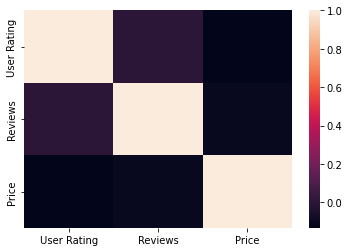

In [158]:
# Haz una gráfica donde podemos comparar la relación entre las tres variables 
# numéricas (User Rating, Reviews y Price) y que, además, podamos ver el efecto <-- (??)
# del libro. La variable año, a pesar de ser numérica, la vamos a considerar como
# cualitativa, así que la eliminaremos del análisis.

df2 = df[['User Rating', 'Reviews', 'Price']]
iris_corr = df2.corr()
sns.heatmap(data=iris_corr)